In [183]:
# Class : DSC540-T301 Data Preparation (2237-1)
# Name : Rajib Samanta
# Assignment : Project Milestone 2
## Assignment:  Cleaning/Formatting Flat File Source

##     Project: Data Exploration on Marijuana Arrests(D.C)
##         Name: Rajib Samanta

# Overview
## According to the ACLU’s original analysis, marijuana arrests now account for over half of all drug arrests in the United States. Of the 8.2 million marijuana arrests between 2001 and 2010,
## 88% were for simply having marijuana. Nationwide, the arrest data revealed one consistent trend: significant racial bias.
## Despite roughly equal usage rates, Blacks are 3.73 times more likely than whites to be arrested for marijuana. The laws related to the recreational use and possession of marijuana have changed at two milestones: the effective dates of the Marijuana Possession Decriminalization Amendment Act of 2014 on July 17, 2014, and of Initiative 71 on February 26, 2015 (https://mpdc.dc.gov/marijuana).


# Data Sources
# Flat File:adult_income_data.csv
## Description: This data includes arrests made by the Metropolitan Police Department (MPD). The data represents individuals arrested with a marijuana charge, regardless of whether there was a more serious secondary charge.
## Link or Flat File uploaded: 
## https://www.kaggle.com/code/utkarshx27/exploring-dc-marijuana-arrests-insights-trends/input


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Read in the Marijuana_Arrests dataset (given as a .csv file) from local:
directory = '/Users/rajibsamanta/Documents/Rajib/College/Sem5 2023/'  # Replace with the actual directory path

# Set the working directory
os.chdir(directory)
print(os.getcwd())
data = pd.read_csv("Marijuana_Arrests.csv")
data.head()
# Display the DataFrame


/Users/rajibsamanta/Documents/Rajib/College/Sem5 2023


,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,OFFENSE_BLOCKX,OFFENSE_BLOCKY,...,ADDRESS,ARREST_BLOCKX,ARREST_BLOCKY,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,GLOBALID
0,Possession,Adult,2012,2012/01/01 06:00:00+00,b';\xc8k~\xa4iJ',20.0,5D,501.0,399700.0,137900.0,...,FLORIDA AVE NE,401400.0,136900.0,MARIJUANA_ARRESTS_1,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12481,{4654D30A-5B56-4E19-8FC2-B19CC723C747}
1,Possession,Adult,2012,2012/01/01 06:00:00+00,b';\xc8k~\xa4iJ',23.0,5D,501.0,399700.0,137900.0,...,FLORIDA AVE NE,401400.0,136900.0,MARIJUANA_ARRESTS_2,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12482,{1C0EBA86-27EC-4B8E-8ABB-6EFFF03A0AA2}
2,Possession,Adult,2012,2012/01/01 06:00:00+00,b't6\xa0\xac\xec`\xa4',46.0,7D,707.0,399700.0,130600.0,...,3300 BLOCK OF BROTHERS PL SE,399700.0,130600.0,MARIJUANA_ARRESTS_3,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12483,{88080D68-CFA3-41E6-AA69-5DB7F950A134}
3,Possession,Adult,2012,2012/01/01 09:35:00+00,b'\xbe\x1d\xa7\xf5\xffWx',30.0,6D,605.0,403300.0,134500.0,...,700 BLOCK OF 32ND ST SE,NaN,NaN,MARIJUANA_ARRESTS_4,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12484,{7769980A-5F36-4B3C-91CF-D1A3A94CE52E}
4,Possession with intent to distribute,Adult,2012,2012/01/02 19:40:00+00,b'\xbb\xc0\x8e\x94\x81\xac\xcd',29.0,6D,604.0,406400.0,135300.0,...,5300 BLOCK OF B ST SE,NaN,NaN,MARIJUANA_ARRESTS_5,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12485,{5D5BEE85-DF16-41A1-BB49-0D16D0EE1320}


In [184]:
# pip install fuzzywuzzy

In [185]:
data.shape
# No of rows : 13063 and Number of columns : 27

(13063, 27)

In [186]:
# List all the columns
columns = data.columns.tolist()
# Print the column names
print(columns)

['TYPE', 'ADULT_JUVENILE', 'YEAR', 'DATETIME', 'CCN', 'AGE', 'OFFENSE_DISTRICT', 'OFFENSE_PSA', 'OFFENSE_BLOCKX', 'OFFENSE_BLOCKY', 'DEFENDANT_PSA', 'DEFENDANT_DISTRICT', 'RACE', 'ETHNICITY', 'SEX', 'CATEGORY', 'DESCRIPTION', 'ADDRESS', 'ARREST_BLOCKX', 'ARREST_BLOCKY', 'GIS_ID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED', 'OBJECTID', 'GLOBALID']


In [187]:
# Get information about the DataFrame
data_info = data.info()
# Print the DataFrame info
print(data_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13063 entries, 0 to 13062
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TYPE                13063 non-null  object 
 1   ADULT_JUVENILE      13063 non-null  object 
 2   YEAR                13063 non-null  int64  
 3   DATETIME            13063 non-null  object 
 4   CCN                 12510 non-null  object 
 5   AGE                 12466 non-null  float64
 6   OFFENSE_DISTRICT    13063 non-null  object 
 7   OFFENSE_PSA         13036 non-null  float64
 8   OFFENSE_BLOCKX      12461 non-null  float64
 9   OFFENSE_BLOCKY      12461 non-null  float64
 10  DEFENDANT_PSA       12328 non-null  object 
 11  DEFENDANT_DISTRICT  12363 non-null  object 
 12  RACE                12510 non-null  object 
 13  ETHNICITY           12510 non-null  object 
 14  SEX                 12510 non-null  object 
 15  CATEGORY            13063 non-null  object 
 16  DESC

In [188]:
# About Dataset
## Column	Description	Format
## TYPE	Indicates the type of arrest
## ADULT_JUVENILE	Specifies whether the arrestee is an adult or a juvenile	Text
## YEAR	The year in which the arrest occurred	Numeric
## DATETIME	The date and time of the arrest	Text
## CCN	Hash number that allows individuals to determine whether there are multiple arrests associated with one event	Text
## AGE	The age of the arrestee at the time of the arrest	Numeric
## OFFENSE_DISTRICT	The district where the offense took place	Text
## OFFENSE_PSA	The Police Service Area (PSA) associated with the offense	Text
## OFFENSE_BLOCKX	X-coordinate of the approximate block location of the offense	Numeric
## OFFENSE_BLOCKY	Y-coordinate of the approximate block location of the offense	Numeric
## DEFENDANT_PSA	The PSA associated with the defendant	Text
## DEFENDANT_DISTRICT	The district associated with the defendant	Text
## RACE	The race of the defendant, based on officer observation	Text
## ETHNICITY	The ethnicity of the defendant, based on officer observation	Text
## SEX	The gender of the defendant	Text
## CATEGORY	The category of the offense (e.g., possession, distribution, public consumption)	Text
## DESCRIPTION	A description of the offense	Text
## ADDRESS	The address of the offense location	Text
## ARREST_BLOCKX	X-coordinate of the approximate block location of the arrest	Numeric
## ARREST_BLOCKY	Y-coordinate of the approximate block location of the arrest	Numeric
## GIS_ID	Geographic Information System (GIS) ID associated with the record	Text
## CREATOR	The creator of the record	Text
## CREATED	The date and time when the record was created	Text
## EDITOR	The editor of the record	Text
## EDITED	The date and time when the record was last edited	Text
## OBJECTID	Unique identifier for each record	Numeric
## GLOBALID	Global unique identifier for each record	Text

In [189]:
# Change Header 
data = data.rename(columns={'OFFENSE_BLOCKX': 'OFFENSE_X-COORDINATE'})
data = data.rename(columns={'OFFENSE_BLOCKY': 'OFFENSE_Y-COORDINATE'})
data = data.rename(columns={'ARREST_BLOCKX': 'ARREST_X-COORDINATE'})
data = data.rename(columns={'ARREST_BLOCKY': 'ARREST_X-COORDINATE'})

In [190]:
# Format data into a more readable format
# Convert the column to datetime format
data['DATETIME'] = pd.to_datetime(data['DATETIME'])
data['CREATED'] = pd.to_datetime(data['CREATED'])
data['EDITED'] = pd.to_datetime(data['EDITED'])

# Reformat the datetime values
data['DATETIME'] = data['DATETIME'].dt.strftime('%Y/%m/%d %H:%M:%S')
data['CREATED'] = data['CREATED'].dt.strftime('%Y/%m/%d %H:%M:%S')
data['EDITED'] = data['EDITED'].dt.strftime('%Y/%m/%d %H:%M:%S')
data.head()

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,OFFENSE_X-COORDINATE,OFFENSE_Y-COORDINATE,...,ADDRESS,ARREST_X-COORDINATE,ARREST_X-COORDINATE,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,GLOBALID
0,Possession,Adult,2012,2012/01/01 06:00:00,b';\xc8k~\xa4iJ',20.0,5D,501.0,399700.0,137900.0,...,FLORIDA AVE NE,401400.0,136900.0,MARIJUANA_ARRESTS_1,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12481,{4654D30A-5B56-4E19-8FC2-B19CC723C747}
1,Possession,Adult,2012,2012/01/01 06:00:00,b';\xc8k~\xa4iJ',23.0,5D,501.0,399700.0,137900.0,...,FLORIDA AVE NE,401400.0,136900.0,MARIJUANA_ARRESTS_2,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12482,{1C0EBA86-27EC-4B8E-8ABB-6EFFF03A0AA2}
2,Possession,Adult,2012,2012/01/01 06:00:00,b't6\xa0\xac\xec`\xa4',46.0,7D,707.0,399700.0,130600.0,...,3300 BLOCK OF BROTHERS PL SE,399700.0,130600.0,MARIJUANA_ARRESTS_3,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12483,{88080D68-CFA3-41E6-AA69-5DB7F950A134}
3,Possession,Adult,2012,2012/01/01 09:35:00,b'\xbe\x1d\xa7\xf5\xffWx',30.0,6D,605.0,403300.0,134500.0,...,700 BLOCK OF 32ND ST SE,NaN,NaN,MARIJUANA_ARRESTS_4,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12484,{7769980A-5F36-4B3C-91CF-D1A3A94CE52E}
4,Possession with intent to distribute,Adult,2012,2012/01/02 19:40:00,b'\xbb\xc0\x8e\x94\x81\xac\xcd',29.0,6D,604.0,406400.0,135300.0,...,5300 BLOCK OF B ST SE,NaN,NaN,MARIJUANA_ARRESTS_5,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12485,{5D5BEE85-DF16-41A1-BB49-0D16D0EE1320}


In [191]:
# Find the missing values of columns
data.isnull().sum() # Sum of null value for each columns
## From the below table we can see AGE is missing for 597 records, CCN,RACE,ETHNICITY & SEX is missing for 553 records
## We can remove these 553 records a insufficient records or bad data.

TYPE                      0
ADULT_JUVENILE            0
YEAR                      0
DATETIME                  0
CCN                     553
AGE                     597
OFFENSE_DISTRICT          0
OFFENSE_PSA              27
OFFENSE_X-COORDINATE    602
OFFENSE_Y-COORDINATE    602
DEFENDANT_PSA           735
DEFENDANT_DISTRICT      700
RACE                    553
ETHNICITY               553
SEX                     553
CATEGORY                  0
DESCRIPTION               0
ADDRESS                 582
ARREST_X-COORDINATE     970
ARREST_X-COORDINATE     970
GIS_ID                    0
CREATOR                   0
CREATED                   0
EDITOR                    0
EDITED                    0
OBJECTID                  0
GLOBALID                  0
dtype: int64

In [192]:
dataNull = data["RACE"].isna()
data[dataNull]
## CCN,RACE,ETHNICITY & SEX is missing for 553 records 
## We can remove these 553 records a insufficient records or bad data as all above columns has null values

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,OFFENSE_X-COORDINATE,OFFENSE_Y-COORDINATE,...,ADDRESS,ARREST_X-COORDINATE,ARREST_X-COORDINATE,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,GLOBALID
42,Possession with intent to distribute,Juvenile,2012,2012/01/05 05:00:00,NaN,NaN,7D,701.0,NaN,NaN,...,NaN,NaN,NaN,MARIJUANA_ARRESTS_43,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12523,{0573D242-F205-4519-B483-D4FD6386759A}
56,Possession,Juvenile,2012,2012/01/06 05:00:00,NaN,NaN,3D,307.0,NaN,NaN,...,NaN,NaN,NaN,MARIJUANA_ARRESTS_57,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12537,{2CC11F3D-2B87-4F6F-B71C-014EDB65CBCF}
75,Distribution,Juvenile,2012,2012/01/07 05:00:00,NaN,NaN,1D,105.0,NaN,NaN,...,NaN,NaN,NaN,MARIJUANA_ARRESTS_76,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12556,{02EFCD74-6E32-4CB9-809F-1EA1DF4C332F}
76,Distribution,Juvenile,2012,2012/01/07 05:00:00,NaN,NaN,1D,105.0,NaN,NaN,...,NaN,NaN,NaN,MARIJUANA_ARRESTS_77,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12557,{3C8A9F29-F57D-477A-9DF0-581746DF571A}
83,Possession,Juvenile,2012,2012/01/08 05:00:00,NaN,NaN,7D,703.0,NaN,NaN,...,NaN,NaN,NaN,MARIJUANA_ARRESTS_84,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12564,{48FCBB48-EA1A-4B78-8FD9-6E1E5032C37F}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13058,Possession with intent to distribute,Juvenile,2021,2021/12/03 05:00:00,NaN,NaN,4D,403.0,NaN,NaN,...,NaN,NaN,NaN,MARIJUANA_ARRESTS_13059,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,25539,{32BCC186-3BB1-4F80-8D17-FB2416635554}
13059,Possession with intent to distribute,Juvenile,2021,2021/12/04 05:00:00,NaN,NaN,7D,702.0,NaN,NaN,...,NaN,NaN,NaN,MARIJUANA_ARRESTS_13060,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,25540,{A91CDAA3-B495-41DB-9960-FE56D629E73F}
13060,Public consumption,Juvenile,2021,2021/12/11 05:00:00,NaN,NaN,4D,403.0,NaN,NaN,...,NaN,NaN,NaN,MARIJUANA_ARRESTS_13061,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,25541,{CF889832-B7D2-4DD4-B0DB-8453C97D450F}
13061,Possession,Juvenile,2021,2021/12/18 05:00:00,NaN,NaN,6D,608.0,NaN,NaN,...,NaN,NaN,NaN,MARIJUANA_ARRESTS_13062,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,25542,{1DB2096B-346A-46E5-9724-942DBA82DB76}


In [193]:
# Remove rows with null values in column CCN,RACE,ETHNICITY & SEX
data = data.dropna(subset=['RACE'])
data.shape
## After removing 553 row nor count is 12510, earlier was 13063

(12510, 27)

In [194]:
# data.describe
data.head()

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,OFFENSE_X-COORDINATE,OFFENSE_Y-COORDINATE,...,ADDRESS,ARREST_X-COORDINATE,ARREST_X-COORDINATE,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,GLOBALID
0,Possession,Adult,2012,2012/01/01 06:00:00,b';\xc8k~\xa4iJ',20.0,5D,501.0,399700.0,137900.0,...,FLORIDA AVE NE,401400.0,136900.0,MARIJUANA_ARRESTS_1,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12481,{4654D30A-5B56-4E19-8FC2-B19CC723C747}
1,Possession,Adult,2012,2012/01/01 06:00:00,b';\xc8k~\xa4iJ',23.0,5D,501.0,399700.0,137900.0,...,FLORIDA AVE NE,401400.0,136900.0,MARIJUANA_ARRESTS_2,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12482,{1C0EBA86-27EC-4B8E-8ABB-6EFFF03A0AA2}
2,Possession,Adult,2012,2012/01/01 06:00:00,b't6\xa0\xac\xec`\xa4',46.0,7D,707.0,399700.0,130600.0,...,3300 BLOCK OF BROTHERS PL SE,399700.0,130600.0,MARIJUANA_ARRESTS_3,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12483,{88080D68-CFA3-41E6-AA69-5DB7F950A134}
3,Possession,Adult,2012,2012/01/01 09:35:00,b'\xbe\x1d\xa7\xf5\xffWx',30.0,6D,605.0,403300.0,134500.0,...,700 BLOCK OF 32ND ST SE,NaN,NaN,MARIJUANA_ARRESTS_4,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12484,{7769980A-5F36-4B3C-91CF-D1A3A94CE52E}
4,Possession with intent to distribute,Adult,2012,2012/01/02 19:40:00,b'\xbb\xc0\x8e\x94\x81\xac\xcd',29.0,6D,604.0,406400.0,135300.0,...,5300 BLOCK OF B ST SE,NaN,NaN,MARIJUANA_ARRESTS_5,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12485,{5D5BEE85-DF16-41A1-BB49-0D16D0EE1320}


In [195]:
# Identify outliers

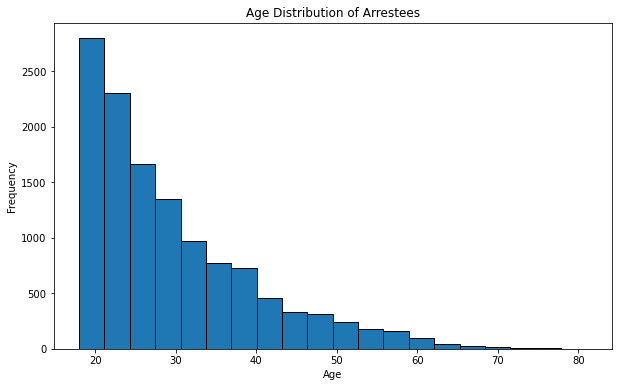

In [196]:
plt.figure(figsize=(10, 6))
plt.hist(data['AGE'],edgecolor='black', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Arrestees')
plt.show()

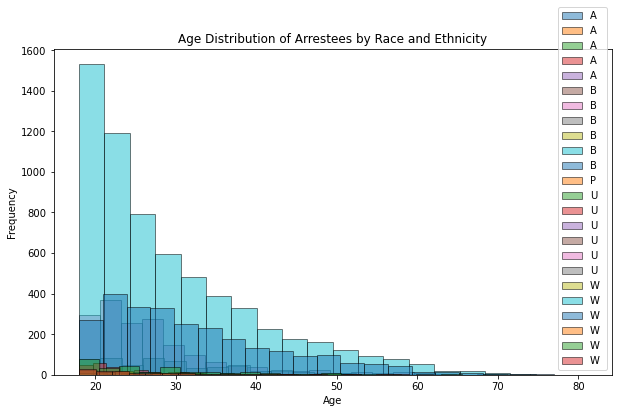

In [197]:
# Age Distribution of Arrestees by Race and Ethnicity
grouped = data.groupby(['RACE', 'ETHNICITY'])
plt.figure(figsize=(10, 6))
for group, data1 in grouped:
    plt.hist(data1['AGE'], bins=20,edgecolor='black', alpha=0.5, label=group)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Arrestees by Race and Ethnicity')
plt.legend()
plt.show()

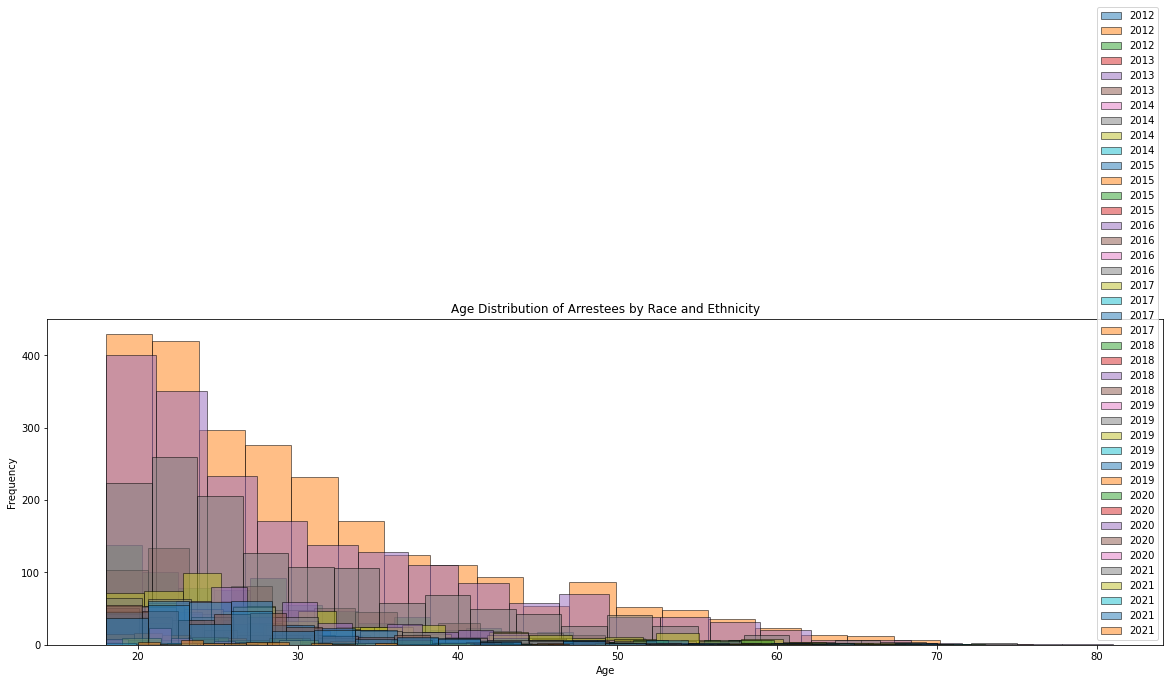

(12510, 27)

In [198]:
# Age Distribution of Arrestees by YEAR and TYPE
grouped = data.groupby(['YEAR', 'TYPE'])
plt.figure(figsize=(20, 6))
for group, data1 in grouped:
    plt.hist(data1['AGE'], bins=20,edgecolor='black', alpha=0.5, label=group)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Arrestees by Race and Ethnicity')
plt.legend()
plt.show()
data.shape

In [199]:
## --> From the above plot we can say that below 10 years and above 70 years datas are outlier
# Now remove the outlier
data = data[(data['AGE'] <= 70) & (data['AGE'] >= 10)]  # using operator
data.shape
## Removed 60 outlier rows

(12455, 27)

In [200]:
# Find duplicates based on key columns "TYPE","ADULT_JUVENILE", "OFFENSE_DISTRICT", "YEAR","CCN", "AGE", "SEX", "RACE"
# create data set with duplicate values
duplicate_data = data[data.duplicated(subset=["TYPE","ADULT_JUVENILE", "OFFENSE_DISTRICT", "YEAR","CCN", "AGE", "SEX", "RACE"])]
# Remove duplicate from the original data set
data = data[~data.duplicated(subset=["TYPE","ADULT_JUVENILE", "OFFENSE_DISTRICT", "YEAR","CCN", "AGE", "SEX", "RACE"])]

data.shape
## --> Removed 216 duplicate rows

(12239, 27)

In [201]:
#data.head()

In [202]:
# Fix casing or inconsistent values
# Convert all values in the 'Name' column to lowercase
#data['TYPE'] = data['Name'].str.lower()

# Capitalize the first letter of each value in the 'Name' column
data['TYPE'] = data['TYPE'].str.capitalize()
data['ADULT_JUVENILE'] = data['ADULT_JUVENILE'].str.capitalize()
# Capitalize the first letter of each word in the 'Name' column
data['ADDRESS'] = data['ADDRESS'].str.title()
data['ADDRESS'] = data['ADDRESS'].astype(str)


# Convert the 'Age' column to integer
data['AGE'] = data['AGE'].astype(int)
# Print the DataFrame with fixed casing
data

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,OFFENSE_X-COORDINATE,OFFENSE_Y-COORDINATE,...,ADDRESS,ARREST_X-COORDINATE,ARREST_X-COORDINATE,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,GLOBALID
0,Possession,Adult,2012,2012/01/01 06:00:00,b';\xc8k~\xa4iJ',20,5D,501.0,399700.0,137900.0,...,Florida Ave Ne,401400.0,136900.0,MARIJUANA_ARRESTS_1,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12481,{4654D30A-5B56-4E19-8FC2-B19CC723C747}
1,Possession,Adult,2012,2012/01/01 06:00:00,b';\xc8k~\xa4iJ',23,5D,501.0,399700.0,137900.0,...,Florida Ave Ne,401400.0,136900.0,MARIJUANA_ARRESTS_2,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12482,{1C0EBA86-27EC-4B8E-8ABB-6EFFF03A0AA2}
2,Possession,Adult,2012,2012/01/01 06:00:00,b't6\xa0\xac\xec`\xa4',46,7D,707.0,399700.0,130600.0,...,3300 Block Of Brothers Pl Se,399700.0,130600.0,MARIJUANA_ARRESTS_3,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12483,{88080D68-CFA3-41E6-AA69-5DB7F950A134}
3,Possession,Adult,2012,2012/01/01 09:35:00,b'\xbe\x1d\xa7\xf5\xffWx',30,6D,605.0,403300.0,134500.0,...,700 Block Of 32Nd St Se,NaN,NaN,MARIJUANA_ARRESTS_4,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12484,{7769980A-5F36-4B3C-91CF-D1A3A94CE52E}
4,Possession with intent to distribute,Adult,2012,2012/01/02 19:40:00,b'\xbb\xc0\x8e\x94\x81\xac\xcd',29,6D,604.0,406400.0,135300.0,...,5300 Block Of B St Se,NaN,NaN,MARIJUANA_ARRESTS_5,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12485,{5D5BEE85-DF16-41A1-BB49-0D16D0EE1320}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13029,Possession with intent to distribute,Adult,2021,2021/12/06 21:00:00,105e0539b622e4c6,18,7D,706.0,400700.0,129500.0,...,3800 Block Of 9Th Street Se,400700.0,129500.0,MARIJUANA_ARRESTS_13030,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,25510,{E601ABAA-7760-46D5-8062-63AF36923BEE}
13030,Possession with intent to distribute,Adult,2021,2021/12/23 21:00:00,14daeb983691273a,28,7D,708.0,398900.0,128600.0,...,4600 Block Of Martin Luther King Jr Avenue Sw,398900.0,128600.0,MARIJUANA_ARRESTS_13031,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,25511,{2FD433F4-4C4E-43CD-9843-3343C8F9187C}
13031,Possession with intent to distribute,Adult,2021,2021/12/23 21:00:00,14daeb983691273a,35,7D,708.0,398900.0,128600.0,...,4600 Block Of Martin Luther King Jr Avenue Sw,398900.0,128600.0,MARIJUANA_ARRESTS_13032,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,25512,{C748915D-AF10-42A3-98A1-1225BDBE4209}
13032,Possession with intent to distribute,Adult,2021,2021/04/26 11:00:00,f09f73792bd6d544,31,7D,701.0,401700.0,132700.0,...,2300 Block Of Green Street Se,401700.0,132700.0,MARIJUANA_ARRESTS_13033,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,25513,{7C8C3268-3EA9-419F-A0D5-EDCACDEAEF9B}


In [203]:
# Conduct Fuzzy Matching
## conduct Fuzzy search to find out the address with 'King Jr Avenue Sw'

# Target address to match
target_address = 'King Jr Avenue Sw'

# Calculate similarity scores for each address in the DataFrame
data['Similarity Score'] = data['ADDRESS'].apply(lambda x: fuzz.ratio(target_address.lower(), x.lower()))

# Find the best match and its similarity score
best_match = process.extractOne(target_address.lower(), data['ADDRESS'].apply(lambda x: x.lower()))
best_match_address = best_match[0]
best_match_score = best_match[1]

# Print the DataFrame and the best match
print("DataFrame:")
#print(data)
print("\nBest Match:")
print(f"Address: {best_match_address}")
print(f"Similarity Score: {best_match_score}")

DataFrame:

Best Match:
Address: 4600 block of martin luther king jr avenue sw
Similarity Score: 90


In [204]:
##--> Address: 4600 block of martin luther king jr avenue sw has similary score of 90